In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.info()

In [ ]:
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.info()

In [ ]:
df.Gender.value_counts()

In [ ]:
for i in df.columns:
    if df[i].dtypes=='float64':
        df[i]=df[i].fillna(df[i].mean())
        

In [ ]:
df.info()

In [ ]:
df

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtypes== 'object':
        df[i]=le.fit_transform(df[i])

In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [36]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [37]:
df_cor=df.corr()

In [38]:
df_cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<Axes: >

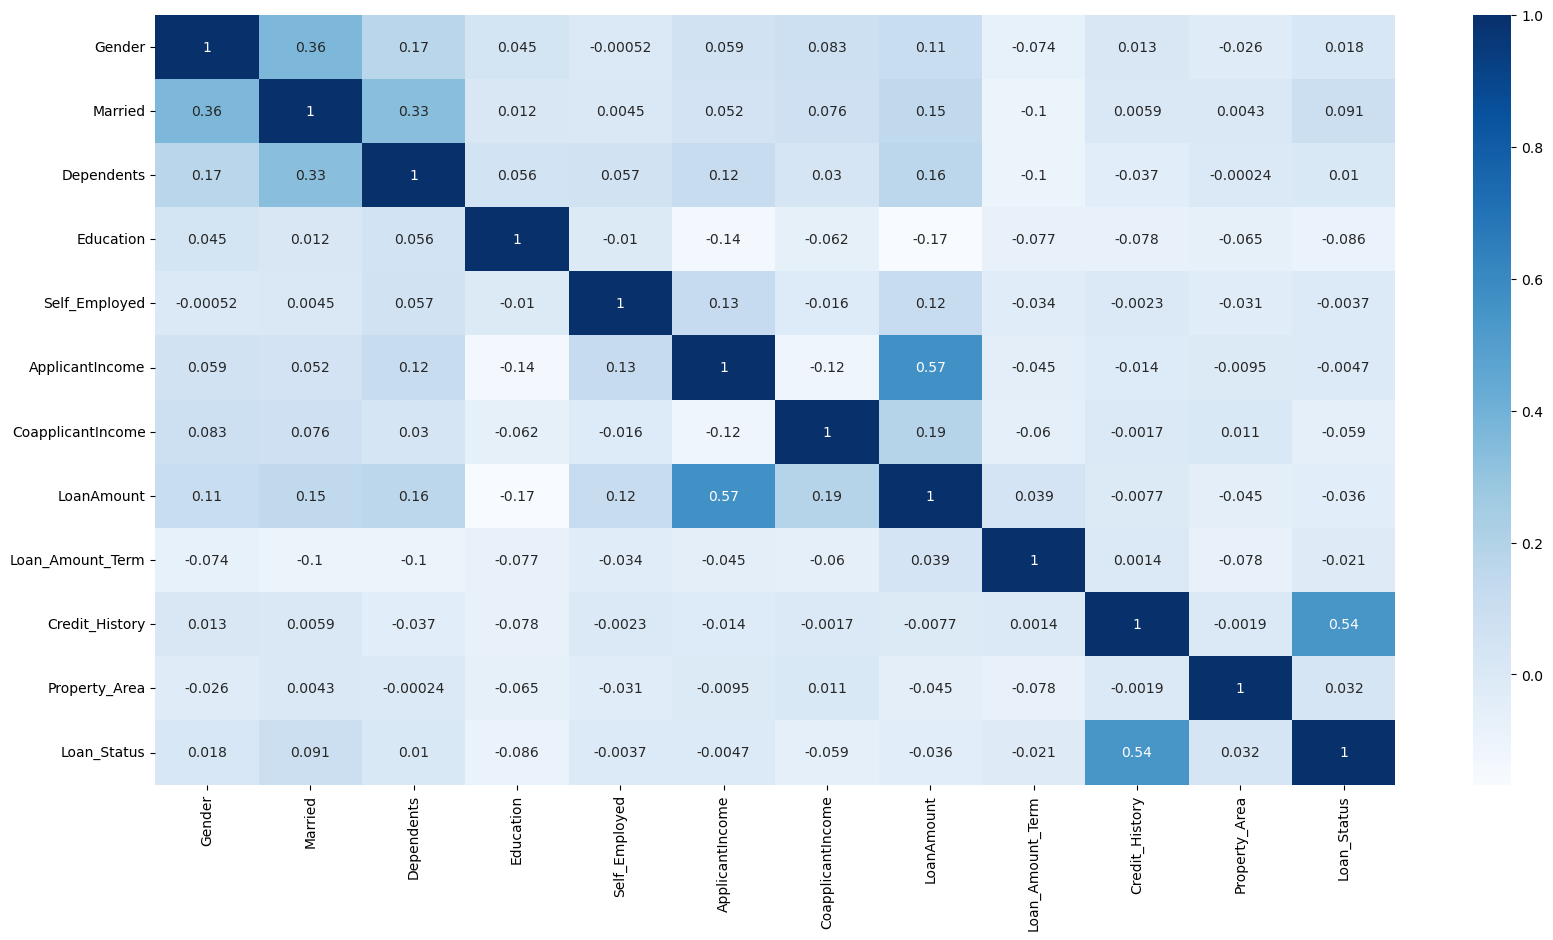

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cor,annot=True,cmap='Blues')

<Axes: >

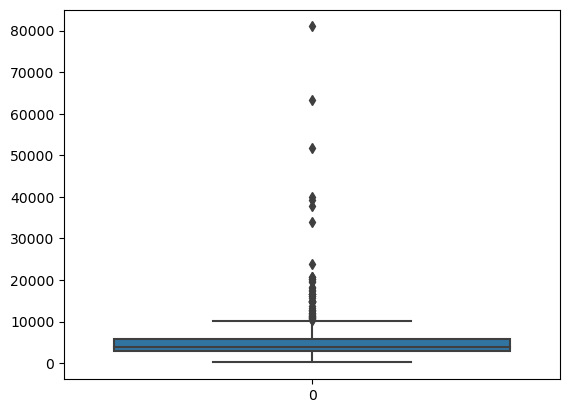

In [41]:
sns.boxplot(df.ApplicantIncome)

<Axes: >

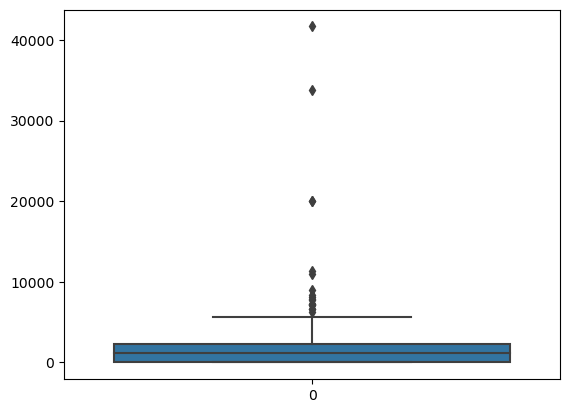

In [42]:
sns.boxplot(df.CoapplicantIncome)

<Axes: >

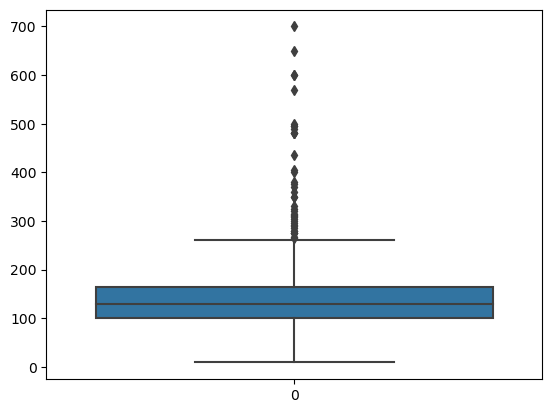

In [43]:
sns.boxplot(df.LoanAmount)

<Axes: >

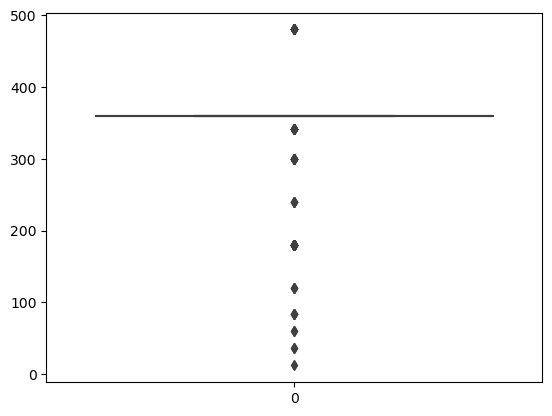

In [44]:
sns.boxplot(df.Loan_Amount_Term)

<Axes: >

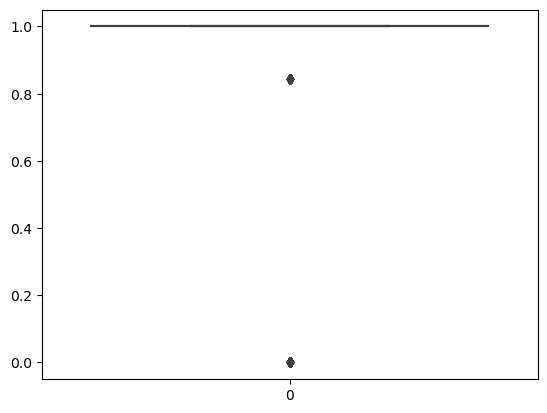

In [45]:
sns.boxplot(df.Credit_History)

<Axes: >

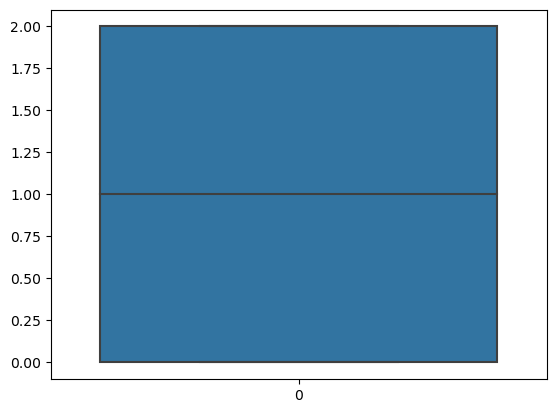

In [46]:
sns.boxplot(df.Property_Area)

In [47]:
from scipy.stats import zscore

In [48]:
z=np.abs(zscore(df))

In [51]:
df_new=df[(z<3).all(axis=1)]

In [52]:
df_new.shape,df.shape

((577, 12), (614, 12))

In [53]:
from scipy.stats import iqr

In [54]:
IQR=iqr(df)
IQR

132.0

In [66]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)

df_1=df[~ ((df <(Q1 -1.5*IQR)) | ((df > (Q3 + (1.5*IQR)))).any(axis=1))]

In [67]:
df_1.shape

(614, 12)

In [68]:
df=df_new

In [69]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [57]:
df_1.shape

(614, 12)

In [70]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [71]:
x=df.iloc[:,:-1]

In [72]:
y=df.iloc[:,-1]

In [73]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [74]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
x=StandardScaler().fit_transform(x)

In [77]:
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23940793,
         0.45646138, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23940793,
         0.45646138,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23940793,
         0.45646138,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23940793,
        -2.37248823, -0.03952504]])

In [78]:
x=pd.DataFrame(x)

In [79]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,0.184585,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.143355,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.247642,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.285844,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.088189,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.596048,-0.861036,-1.158587,0.239408,0.456461,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.189012,-0.861036,-1.710730,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.149549,-0.715592,2.083030,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,0.984507,-0.861036,0.907499,0.239408,0.456461,1.227472


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

In [86]:
maxaccu=0
maxrs=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxaccu:
        maxaccu=score
        maxrs=i
print('best accuracy is:-',maxaccu,'in random state:-',maxrs)

best accuracy is:- 0.9051724137931034 in random state:- 12


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [90]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]

In [92]:
for m in model:
    print('=='*10)
    print('accuracy of :-',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:-',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report:-',classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print('cross val score:-',score.mean())
    print('\n')
    

accuracy of :- LogisticRegression()
accuracy score:- 0.9051724137931034
confusion matrix [[17 10]
 [ 1 88]]
classification report:-               precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116

[0.81034483 0.79310345 0.79130435 0.86956522 0.82608696]
cross val score:- 0.8180809595202397


accuracy of :- DecisionTreeClassifier()
accuracy score:- 0.7844827586206896
confusion matrix [[22  5]
 [20 69]]
classification report:-               precision    recall  f1-score   support

           0       0.52      0.81      0.64        27
           1       0.93      0.78      0.85        89

    accuracy                           0.78       116
   macro avg       0.73      0.80      0.74       116
weighted avg       0.84      0.78    

In [117]:
param={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [118]:
svc_gd=GridSearchCV(SVC(),param,cv=5)

In [119]:
svc_gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [120]:
svc_gd.best_estimator_

SVC(C=1, gamma=0.1)

In [122]:
svc_gd.best_score_

0.7982702197288453

In [123]:
svc_gd_pred=svc_gd.best_estimator_.predict(x_test)

In [124]:
svc_gd_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1])

In [125]:
import joblib
joblib.dump(svc_gd.best_estimator_,'Loan_status_pred.obj')

['Loan_status_pred.obj']

In [126]:
test=joblib.load('Loan_status_pred.obj')

In [127]:
test.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1])

In [128]:
y_test

455    1
406    1
234    1
548    0
16     1
      ..
379    1
90     1
298    0
113    1
386    1
Name: Loan_Status, Length: 116, dtype: int32